In [1]:
import numpy as np
import wisps
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm
%matplotlib inline

In [2]:
import wisps.simulations as wispsim

In [3]:
brf=wispsim.simulate_spts(recompute=False, name="baraffe2003")

In [4]:
brf.keys()

dict_keys(['sing_evol', 'sing_spt', 'prim_evol', 'prim_spt', 'sec_evol', 'sec_spt', 'binary_spt'])

In [5]:
m0=(brf['sing_evol'])['mass']
m1=(brf['prim_evol'])['mass']
m2=(brf['sec_evol'])['mass']

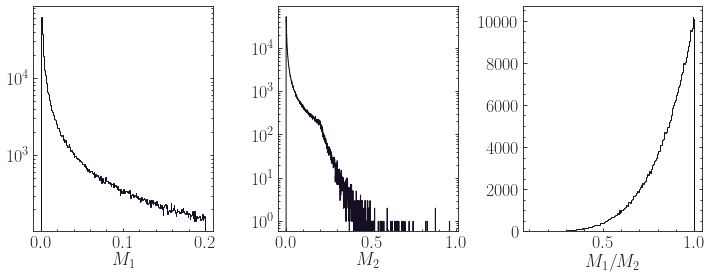

In [19]:
fig, ax=plt.subplots(ncols=3, figsize=(10, 4))
h=ax[0].hist(m1.value, bins='auto', histtype='step', normed=False)
h=ax[1].hist(m2.value, bins='auto', histtype='step', normed=False)
h=ax[2].hist(m1.value/m2.value, bins='auto',  histtype='step', normed=False)

ax[1].set_yscale('log')
ax[0].set_yscale('log')

ax[0].set_xlabel(r'$M_1$', fontsize=18)
ax[1].set_xlabel(r'$M_2$', fontsize=18)
ax[2].set_xlabel(r'$M_1/M_2$', fontsize=18)
plt.tight_layout()

for a in ax:
    a.minorticks_on()

In [7]:
def my_limit(spts):
    idx=np.logical_and((spts>= 17), (spts <=40))
    return spts[idx]

In [8]:
#custom_histogram(teffs_bar, teffgrid, 150)*normteff_bar
spgrid=np.arange(17, 40, 5)

In [9]:
import seaborn as sns
#flatui =['#001f3f', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00']
sns.set_palette(sns.color_palette("cubehelix", 12))

In [16]:
def get_values(model, b):
    b=round(b, 1)
    
    syst=wispsim.make_systems(model_name=model, bfraction=b)
    
    sps=(syst['system_spts'])
    mss=(syst['system_mass'])
    
    norm = 2.0*(10**-3)/ len(mss[np.logical_and(mss>=.09, mss <=.1)])
    vls=norm*wisps.custom_histogram(sps, spgrid, 5)
    
    return vls
    

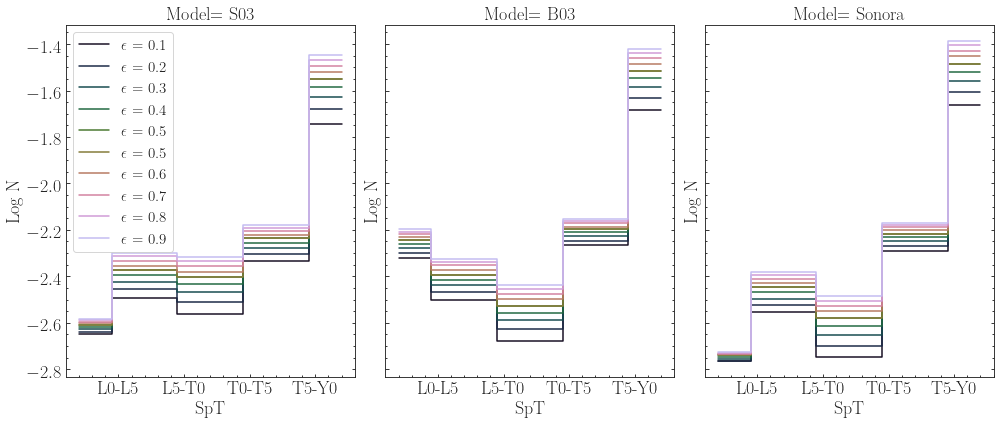

In [17]:
binfr=np.linspace(0.1, 0.9, 10)

fig, ax=plt.subplots(figsize=(14, 6), ncols=3, sharey=True, sharex=True)

for b in binfr:
    b=round(b, 1)
    ax[0].step(spgrid, np.log10(get_values('saumon2008', b)), label=r'$\epsilon$ = {}'.format(b), where='mid')
    ax[1].step(spgrid, np.log10(get_values('baraffe2003', b)), label=r'$\epsilon$ = {}'.format(b), where='mid')
    ax[2].step(spgrid, np.log10(get_values('marley2019', b)), label=r'$\epsilon$ = {}'.format(b), where='mid')
    


for a in ax:
    a.minorticks_on()
    a.set_xlabel('SpT', fontsize=18)
    a.set_ylabel(r'Log N', fontsize=18)
    a.set_xticklabels(['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-Y0'])
    
ax[0].legend(fontsize=15)
ax[0].set_title('Model= S03', fontsize=18)
ax[1].set_title('Model= B03', fontsize=18)
ax[2].set_title('Model= Sonora', fontsize=18)

plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/binary_effects.pdf', bbox_inches='tight')